In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

### 01_모평균 추정

In [3]:
# 평균4, 표준편차 0.8(분산 0.64)인 정규분포를 구성한다.
# 정규분포를 가지고 있는 객체를 생성한다.
population = stats.norm(loc=4, scale=0.8)

In [4]:
# 위에서 만든 정규분포 객체를 통해 정규분포를 따르는 랜덤값 10개를 추출한다.
# 전체 모집단에서 표본을 추출하는 것을 가정한다.
np.random.seed(1)
# size : 추출할 랜덤값 개수
sample = population.rvs(size=10)
sample

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [5]:
# scipy 의 함수를 가지고도 할 수 있다.
np.random.seed(1)
a1 = stats.norm.rvs(loc=4, scale=0.8, size=10)
a1

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [6]:
# 샘플의 평균을 계산한다.
np.mean(sample)
# 모평균은 4였지만 sample 의 평균은 3.9 정도이다.
# sample 의 평균은 이와 다를 수도 있다.

3.9222872873551196

### 표본 평균을 어러번 계산한다.

In [14]:
# 표본 평균을 계산하는 작업을 여러 번 반복한다.
# 길이가 10000인 배열
# 평균값을 저장하는 배열
sample_mean_array = np.zeros(10000)

In [16]:
# 평균4, 표준편차 0.8(분산 0.64)인 정규분포를 구성한다.
# 정규분포를 가지고 있는 객체를 생성한다.
population = stats.norm(loc=4, scale=0.8)
np.random.seed(1)
# 10개의 데이터를 선택해 평균값을 구하는 시도를 10000번 반복한다.
for i in range(10000) :
    # size : 추출할 랜덤값 개수
    sample_loop = population.rvs(size=10)
    # 추출한 값의 평균을 구해 배열에 담아준다.
    sample_mean_array[i] = np.mean(sample_loop)

In [18]:
sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562, 4.57489661,
       4.09896685])

In [20]:
# 표본추출을 10000번 수행하여 얻은 데이터의 평균을 구해본다.
# 횟수를 많이 수행하면 모집단의 평균과 유사해진다.
np.mean(sample_mean_array)

4.004202422791747

### 02_표본 평균을 몇 번이고 계산하는 함수 만들기

In [28]:
# 평균4, 표준편차 0.8(분산 0.64)인 정규분포를 구성한다.
# 정규분포를 가지고 있는 객체를 생성한다.
population = stats.norm(loc=4, scale=0.8)
np.random.seed(1)
# 표본 평균을 여러 번 계산하는 함수
# size : 표본의 크기,
# n_trial : 시행 횟수
def calc_sample_mean(size, n_trial) :
    # 평균값을 저장하는 배열
    sample_mean_array = np.zeros(n_trial)
    
    for i in range(n_trial) :
        # size : 추출할 랜덤값 개수
        sample_loop = population.rvs(size=size)
        # 추출한 값의 평균을 구해 배열에 담아준다.
        sample_mean_array[i] = np.mean(sample_loop)

    return sample_mean_array

In [30]:
# 사용한다.
np.random.seed(1)
a1 = calc_sample_mean(size=10, n_trial=10000)
np.mean(a1)

4.004202422791747

### 표본 크기별, 표본 평균의 분포

In [33]:
np.random.seed(1)

In [35]:
np.random.seed(1)
# 샘플 사이즈 10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    'sample_mean' : size_10,
    'sample_size' : np.tile('size 10', 10000)
})

# 샘플 사이즈 20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    'sample_mean' : size_20,
    'sample_size' : np.tile('size 20', 10000)
})

# 샘플 사이즈 30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    'sample_mean' : size_30,
    'sample_size' : np.tile('size 30', 10000)
})

# 하나로 합친다
sim_result = pd.concat([size_10_df, size_20_df, size_30_df])
sim_result

,sample_mean,sample_size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10
...,...,...
9995,3.980022,size 30
9996,3.770016,size 30
9997,3.930151,size 30
9998,4.075567,size 30


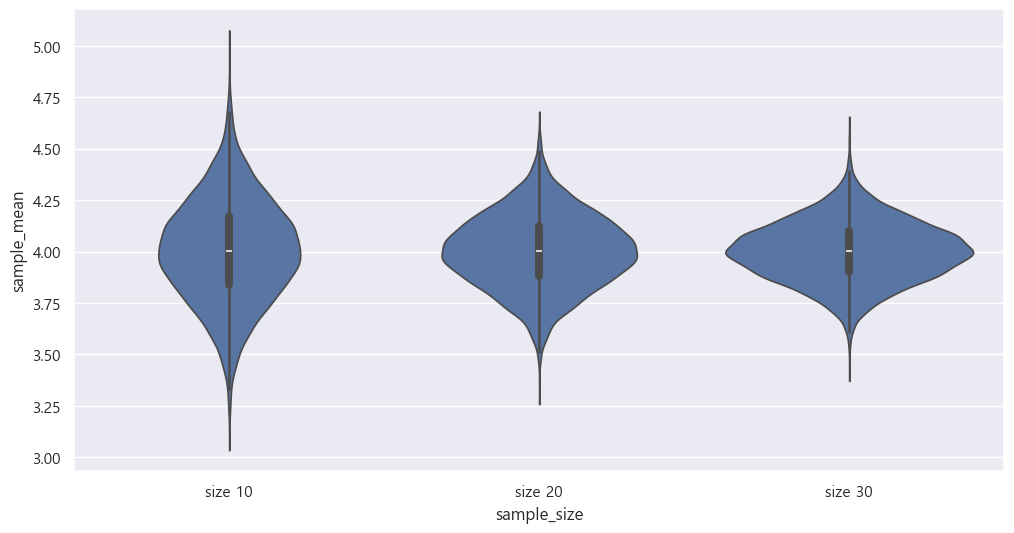

In [37]:
# 이 데이터를 사용하여 세 가지 표본 크기 각각에 대한 표본평균 분포를 확인한다.
sns.violinplot(data=sim_result, x='sample_size', y='sample_mean')
plt.show()

In [39]:
np.random.seed(1)

# 테스트할 샘플 사이즈
test_sample_size_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# 결과를 담을 리스트
test_result_list = []

# 샘플 가지수만큼 반복한다.
for test_sample_size in test_sample_size_list :
    a1 = calc_sample_mean(size=test_sample_size, n_trial=10000)
    a2 = pd.DataFrame({
        'sample_mean' : a1,
        'sample_size' : np.tile(f'size {test_sample_size}', 10000)
    })
    test_result_list.append(a2)

# 하나로 합친다
sim_result = pd.concat(test_result_list)
sim_result

,sample_mean,sample_size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10
...,...,...
9995,3.953051,size 100
9996,4.136771,size 100
9997,4.173852,size 100
9998,4.087364,size 100


In [41]:
# 위의 그래프는  표본평균과 표준편차를 계산하여 수치로도 확인할 수 있다.
group = sim_result.groupby('sample_size', sort=False)
a1 = group.agg(['std', 'mean'])
a1

sample_mean          
                    std      mean
sample_size                      
size 10        0.251358  4.004202
size 20        0.179886  4.000662
size 30        0.145816  4.000859
size 40        0.126372  3.999278
size 50        0.113073  3.999864
size 60        0.103942  3.998782
size 70        0.095955  4.000249
size 80        0.089818  4.000695
size 90        0.084000  3.999938
size 100       0.080125  3.999868